<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# EDA Walkthrough

_Authors: Kiefer Katovich (SF), David Yerrington (SF), Riley Dallas (AUS), Adi Bronshtein (Live Online)_

---

The dataset for today's lesson (`Heart.csv`) comes from the book, [An Introduction to Statistical Learning (ISLR)](https://www.statlearning.com/). It's comprised of diagnostic measurements for 303 patients to determine whether or not they have heart disease (the `AHD` column).

Though in many if not most cases the EDA procedure will be considerably more involved, this should give you an idea of the basic workflow a data scientist would use when working with a new dataset.

By now we know that data cleaning and data exploration are a very important part of any Data Scientist job. Some estimations put it at 80% of the time Data Scientist spends on a project. The other 20\%? Well...   
![](./imgs/clean_data_borat.png)

### Learning Objectives

- Quickly describe a dataset, including data types, missing values and basic descriptive statistics
- Rename columns (series) in a DataFrame
- Visualize data distributions with box plots
- Calculate and visualize correlation

**The Data Science Workflow**
![](./imgs/data-science-workflow.png)

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Load the data

---

Import the CSV into a pandas DataFrame.

In [18]:
file_path = './datasets/Heart.csv'  #the dot signifies the current directory

In [19]:
heart = pd.read_csv(file_path)

## Describe the basic format of the data and the columns

---

Use the `.head()` method (and optionally pass in an integer for the number of rows you want to see) to get a glimpse of your dataset. This is a good initial step to get a feel for what is in the CSV and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [31]:
# Print out the first 8 rows:
heart.head(8)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
5,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,0
6,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,1
7,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,0


In [21]:
# Look at the dtypes of the columns:
heart.dtypes 

Unnamed: 0      int64
Age            object
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD             int64
dtype: object

## Drop unwanted columns

---

It looks like `Unnamed: 0` is an index. This is redundant, since `pandas` automatically creates an index for us (the bold numbers to the left of the DataFrame).

The `.drop()` method can be used to get rid of a column like so:

```python
df.drop(columns=['list', 'columns', 'to', 'drop'], inplace=True)
```

The `inplace=True` parameter makes our change permanent.

In [22]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:
heart['Unnamed: 0'][:20]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Unnamed: 0, dtype: int64

In [33]:
# Remove the unneccesary column:
# heart = heart.drop(labels = 'Unnamed: 0', axis = 1
#heart.drop(labels = 'Unnamed: 0', axis = 1, inplace = True) ## inplace makes the change stick
#heart.drop(columns = ['Unnamed: 0'], inplace=True)
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


## Clean corrupted column

---

From the previous step, we noticed the `Age` column was interpreted as a string, even though the values are integers.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

![](./imgs/data-cleaning.jpg)


**What is causing the `Age` column to be encoded as a string?**

In [35]:
heart['Age'].value_counts()
#the ? is causing the column to be encoded as a string

58    17
57    17
54    16
59    13
60    12
52    12
51    12
56    11
44    11
41    10
64    10
67     9
?      9
62     9
42     8
43     8
63     8
65     8
45     8
61     8
55     8
53     8
48     7
46     7
66     7
49     5
50     5
47     5
70     4
68     4
39     4
35     4
69     3
40     3
71     3
38     2
37     2
34     2
76     1
74     1
29     1
77     1
Name: Age, dtype: int64

In [ ]:
## look at unique values
heart['Age'].unique()

In the cell below, replace all "?" cells with `np.nan`.

In [40]:
## Use np.where(), pass a condition (not equal to ?) and change the value to np.nan
##you want to use .astype() which changes the type of the array, you want to change it to a float since np.nan is a float
np.where(heart['Age'] != '?', heart['Age'], np.nan).astype(float) #this is saying if age is not a question mark, return the age, if it is a question mark replace it with np.nan

array(['63', '67', '67', '37', '41', '56', '62', '57', '63', '53', '57',
       '56', '56', '44', '52', '57', '48', '54', '48', '49', '64', '58',
       '58', '58', '60', '50', nan, '66', '43', '40', '69', '60', '64',
       '59', '44', '42', '43', '57', '55', '61', '65', '40', '71', '59',
       '61', '58', '51', '50', '65', '53', '41', '65', '44', '44', '60',
       '54', '50', '41', '54', '51', '51', '46', nan, '54', '54', '60',
       '60', '54', '59', '46', '65', '67', '62', '65', '44', '65', '60',
       '51', '48', '58', '45', '53', '39', '68', '52', '44', '47', '53',
       '53', '51', '66', '62', nan, '44', '63', '52', '59', '60', '52',
       '48', '45', '34', '57', '71', '49', '54', '59', '57', '61', '39',
       '61', '56', '52', '43', '62', '41', '58', '35', '63', '65', '48',
       nan, '51', '55', '65', '45', '56', '54', '44', '62', '54', '51',
       '29', '51', '43', '55', '70', '62', '35', '51', '59', '59', '52',
       '64', '58', '47', '57', '41', '45', '60', '52', 

In [53]:
#Define a function that returns np.nan for '?' or the number as a float
#This takes a column as input
def change_to_nan(x):
    lst = []
    for i in x:
        if i == '?':
            lst.append(np.nan)
        else:
            lst.append(float(i))
    return lst

heart['Age'] = change_to_nan(heart['Age'])

In [56]:
#another way - takes a single value as input

def age_convert(age):
    if age == '?':
        return np.nan
    else:
        return float(age)
    
heart['Age'].map(age_convert) #by using .map this goes through heart['Age'] element to element and passes each of these values into the age_convert function
heart['Age'] = heart['Age'].map(age_convert)

In [ ]:
## Using map to replace binary values with dictioanry
heart['AHD'].map({0 : 'No', 1: 'Yes'})

In [ ]:
## Another way to define age_convert - a bit more generalized
## Takes a single value as input
def age_convert(age):
    try:
        return float(age)
    except:
        return np.nan

## Determine how many observations are missing

---

Having replaced the question marks with `np.nan` values, we know that there are some missing observations for the `Age` column. 

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing for each column.

We can count the null values for each column like so:

```python
df.isnull().sum()
```

The `.isnull()` method will convert the columns to `True` and `False` values.

The `.sum()` method will then sum these boolean columns, and the total number of null values per column will be returned.

In [57]:
heart.isnull().sum()

Age          9
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [59]:
## We can turn trues and falses into 1s and 0s
heart.isnull().astype(int).head(3)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
## We can turn trues and falses into 1s and 0s
(heart.isnull()*1).head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
##Count sum of missing values
heart.isnull().sum()

Age          9
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

The .mean() method will then average these boolean columns, and the proportion (or percentage) of null values per column will be returned.

In [58]:
heart.isnull().mean()

Age          0.029703
Sex          0.000000
ChestPain    0.000000
RestBP       0.000000
Chol         0.000000
Fbs          0.000000
RestECG      0.000000
MaxHR        0.000000
ExAng        0.000000
Oldpeak      0.000000
Slope        0.000000
Ca           0.013201
Thal         0.006601
AHD          0.000000
dtype: float64

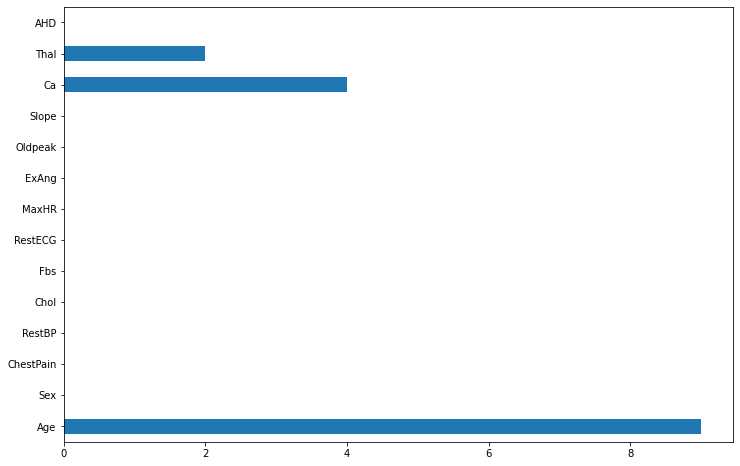

In [63]:
## Quick & Dirty visualization of missing values
plt.figure(figsize = (12,8))
heart.isnull().sum().plot(kind = 'barh'); #you can add .plot to get a quick visual on these data values

In [64]:
heart.isnull().mean() #this shows how much of the proportion of missing values 

Age          0.029703
Sex          0.000000
ChestPain    0.000000
RestBP       0.000000
Chol         0.000000
Fbs          0.000000
RestECG      0.000000
MaxHR        0.000000
ExAng        0.000000
Oldpeak      0.000000
Slope        0.000000
Ca           0.013201
Thal         0.006601
AHD          0.000000
dtype: float64

In [65]:
heart.isnull().mean() * 100 #this provides a percentage

Age          2.970297
Sex          0.000000
ChestPain    0.000000
RestBP       0.000000
Chol         0.000000
Fbs          0.000000
RestECG      0.000000
MaxHR        0.000000
ExAng        0.000000
Oldpeak      0.000000
Slope        0.000000
Ca           1.320132
Thal         0.660066
AHD          0.000000
dtype: float64

**Drop the null values.** 

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values.

The `.dropna()` function will drop any rows that have _**ANY**_ null values for you.  Use this carefully as you could drop many more rows than expected.

In [67]:
heart.shape

(303, 14)

In [ ]:
##Returns a copy of the dataframe (sans missing values)
heart.dropna()

In [69]:
## to make the change stick, use inplace = True
heart.dropna(inplace = True)
heart.shape #notice the rows that were dropped

(288, 14)

In [70]:
# check .isnull().sum() to see that removing the missing values worked
heart.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

## Make the column names more descriptive
---

One minor annoyance is that our column names are not at all intuitive. 

Let's rename them! 

There are two popular methods to renaming columns.

1. Using a _dictionary substitution_, which is very useful if you only want to rename a few columns. 
2. Using a _list replacement_, which is quicker than writing out a dictionary, but requires a full list of names.

We'll explore both options in the cells below.

In [72]:
# Dictionary Method to change column names
new_columns_dict = {
    'Age': 'age',
    'Sex': 'sex_male',
    'ChestPain': 'chest_pain',
    'RestBP': 'resting_blood_pressure',
    'Chol': 'cholesterol',
    'Fbs': 'fasting_blood_sugar',
    'RestECG': 'resting_ecg',
    'MaxHR': 'max_heart_rate',
    'ExAng': 'exercise_induced_angina',
    'Oldpeak': 'old_peak',
    'Slope': 'slope',
    'Ca': 'ca',
    'Thal': 'thallium_stress_test',
    'AHD': 'has_heart_disease',
}



In [74]:
heart.rename(columns = new_columns_dict, inplace = True)
heart.head()

,age,sex_male,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,thallium_stress_test,has_heart_disease
0,63.0,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67.0,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67.0,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37.0,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41.0,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [25]:
# List Replacement Method, this requires you to have the values in the exact order.
new_columns_list = [
    'age',
    'sex_male',
    'chest_pain',
    'resting_blood_pressure',
    'cholesterol',
    'fasting_blood_sugar',
    'resting_ecg',
    'max_heart_rate',
    'exercise_induced_angina',
    'old_peak',
    'slope',
    'ca',
    'thallium_stress_test',
    'has_heart_disease',
]

# df.columns = new_columns_list
heart.columns = new_columns_list

## Describe the summary statistics for the columns
---

<img src="https://snag.gy/07JFa5.jpg" width="350">

---

![](./imgs/sad-panda.png)

---
The `.describe()` function gives summary statistics for each of your columns. What are some, if any, oddities you notice about the columns based on this output?

In [75]:
heart.describe() #this only shows the statistics for columns with numeric values
#heart.describe(include = 'all') this will show the statistics for all columns regardless of numeric values

,age,sex_male,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,has_heart_disease
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.00000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,54.461806,0.677083,131.760417,247.163194,0.145833,1.00000,149.576389,0.329861,1.051042,1.607639,0.656250,0.458333
std,9.138039,0.468405,17.924393,51.425510,0.353553,0.99476,23.152601,0.470981,1.163528,0.620956,0.916304,0.499128
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.00000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.750000,0.000000,0.00000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.00000,152.500000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,276.250000,0.000000,2.00000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.00000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


You can also use `.groupby()` + `.describe()` for cohort analysis

In [78]:
heart.groupby(by = 'has_heart_disease').describe().T #the .T transposes the data so it can lead to better visuals

has_heart_disease           0           1
age count          156.000000  132.000000
    mean            52.506410   56.772727
    std              9.602081    7.994837
    min             29.000000   35.000000
    25%             44.000000   53.000000
...                       ...         ...
ca  min              0.000000    0.000000
    25%              0.000000    0.000000
    50%              0.000000    1.000000
    75%              0.000000    2.000000
    max              3.000000    3.000000

[88 rows x 2 columns]

In [ ]:
## Two different ways to show subsets with the groupby

heart.groupby(by = 'has_heart_disease').describe()[['age', 'ca', 'slope']]

heart.groupby(by = 'has_heart_disease')[['age', 'ca', 'slope']].describe()

In [79]:
heart.groupby(by = 'sex_male')['has_heart_disease'].value_counts(normalize = True) #shows that males have a higher chance of getting heart disease

sex_male  has_heart_disease
0         0                    0.741935
          1                    0.258065
1         1                    0.553846
          0                    0.446154
Name: has_heart_disease, dtype: float64

## Plot variables with potential outliers using boxplots.

---

Here we will use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent

There are more keyword arguments available but those are most relevant for now.

_If you want to check out more, place your cursor in the `boxplot` argument bracket and press `shift+tab` (Press four times repeatedly to bring up detailed documentation)._  

**How to read a box plot**:
![](./imgs/boxplot.png)    

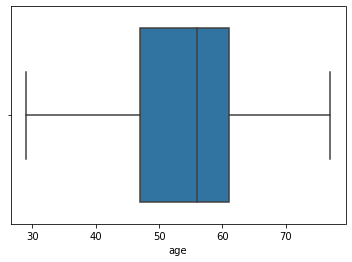

In [82]:
# age
sns.boxplot(x = heart['age']);

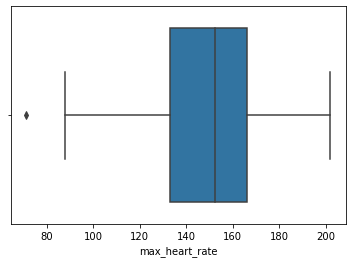

In [90]:
# max heart rate
sns.boxplot(x = heart['max_heart_rate']);

In [87]:
#We see that there is an outlier, we may have to look into this...
#determine if this is a true outlier

heart[heart['max_heart_rate'] < 80]

,age,sex_male,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,thallium_stress_test,has_heart_disease
245,67.0,1,asymptomatic,120,237,0,0,71,0,1.0,2,0.0,normal,1


## Correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.

Below is the formula for the correlation between two variables $X$ and $Y$:

#### Correlation

$$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

![](./imgs/correlation_examples.png)

#### The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using the `.corr()` method.

It's useful to get a feel for which columns are correlated. The `.corr() method` can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [88]:
# A:
heart.corr()

,age,sex_male,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,has_heart_disease
age,1.000000,-0.094471,0.291517,0.200144,0.130069,0.150640,-0.399860,0.105350,0.193581,0.161608,0.358584,0.233030
sex_male,-0.094471,1.000000,-0.067347,-0.173120,0.032875,0.029912,-0.049927,0.137046,0.119853,0.030073,0.089553,0.277575
resting_blood_pressure,0.291517,-0.067347,1.000000,0.129044,0.184773,0.139721,-0.043997,0.061811,0.182143,0.111736,0.094889,0.149796
cholesterol,0.200144,-0.173120,0.129044,1.000000,0.022258,0.170143,-0.012242,0.075597,0.016893,-0.013046,0.109374,0.084361
fasting_blood_sugar,0.130069,0.032875,0.184773,0.022258,1.000000,0.059442,-0.003494,0.003052,0.019111,0.055218,0.176791,0.014809
resting_ecg,0.150640,0.029912,0.139721,0.170143,0.059442,1.000000,-0.058548,0.066933,0.104160,0.124097,0.133791,0.161405
max_heart_rate,-0.399860,-0.049927,-0.043997,-0.012242,-0.003494,-0.058548,1.000000,-0.377610,-0.351614,-0.385075,-0.277720,-0.427872
exercise_induced_angina,0.105350,0.137046,0.061811,0.075597,0.003052,0.066933,-0.377610,1.000000,0.294712,0.241546,0.158700,0.421805
old_peak,0.193581,0.119853,0.182143,0.016893,0.019111,0.104160,-0.351614,0.294712,1.000000,0.577109,0.272410,0.426353
slope,0.161608,0.030073,0.111736,-0.013046,0.055218,0.124097,-0.385075,0.241546,0.577109,1.000000,0.098937,0.334919


In [92]:
#if you want to single out one column
heart.corr()[['has_heart_disease']]

,has_heart_disease
age,0.233030
sex_male,0.277575
resting_blood_pressure,0.149796
cholesterol,0.084361
fasting_blood_sugar,0.014809
resting_ecg,0.161405
max_heart_rate,-0.427872
exercise_induced_angina,0.421805
old_peak,0.426353
slope,0.334919


It can be difficult to spot any outliers simply by staring at our correlation matrix. To help get around this issue, let's use Seaborn's `.heatmap()` to give our correlation matrix some color.

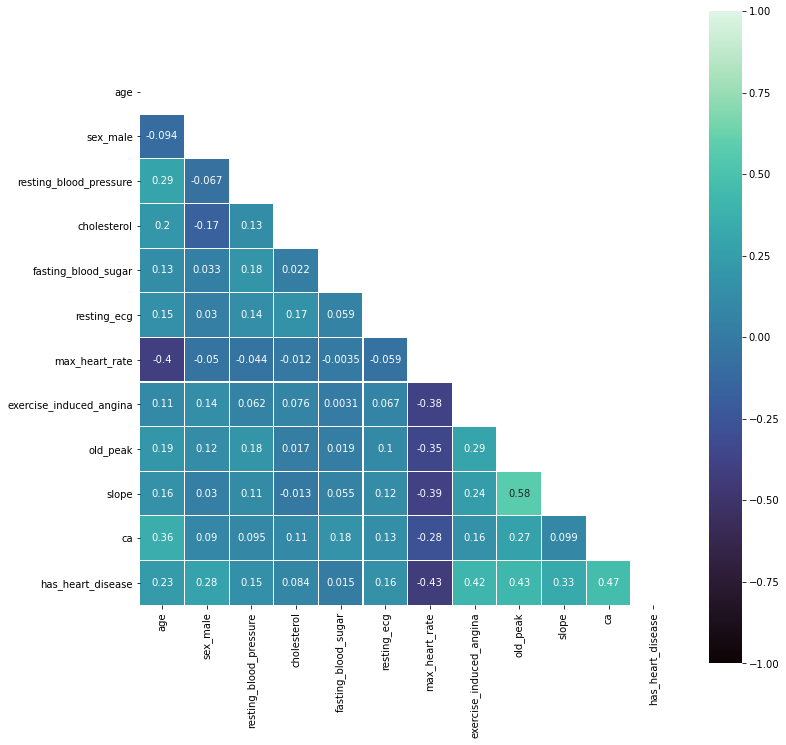

In [96]:
# A:
corr = heart.corr()
plt.figure(figsize=(12,12))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, cmap='mako', annot=True, square=True,
            vmin = -1, vmax = 1, mask = mask,
            linecolor='white', linewidths=0.1);

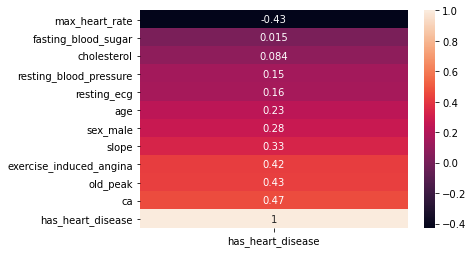

In [98]:
# A:
## Heatmap for one column
sns.heatmap(heart.corr()[['has_heart_disease']].sort_values(by = 'has_heart_disease'),
            annot = True);

**What have we done today?**
1. Described a dataset, including data types, missing values (and handled those missing values!) and basic descriptive statistics
1. "Cleaned" the dataset - dropped unwanted columns, renamed columns (series) in a DataFrame (to make them more descriptive), fix corrupted columns 
1. Visualized data distributions with box plots
1. Calculated and visualized correlation